### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [3]:
# Adding Library
library(ggplot2) # for plots
library(dplyr)

# Adding Missing dataframe in "wash" --> Birth.Year & Gender
wash$Gender <- NA
wash$Birth.Year <- NA

# Adding cities to dataframes

ny$City <- 'New York'
wash$City <- 'Washington'
chi$City <- 'Chicago'

# Concatenation of dataframes --> New York & Washington

concatenation <- function (d1, d2) {
    return(rbind(d1, d2))
 }

# Concatenation all three dataframes Chicago, New York & Washington together as "City"

city <- concatenation(wash,ny)
city <- concatenation(city,chi)

# Printing Output

head(city)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Washington
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA,Washington
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA,Washington
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA,Washington
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA,Washington


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Month,Weekday,Hours,Hours_in_class
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington,6,4,08,8
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Washington,3,7,10,10
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA,Washington,5,3,01,1
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA,Washington,4,1,07,7
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA,Washington,6,7,08,8
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA,Washington,5,1,07,7


Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

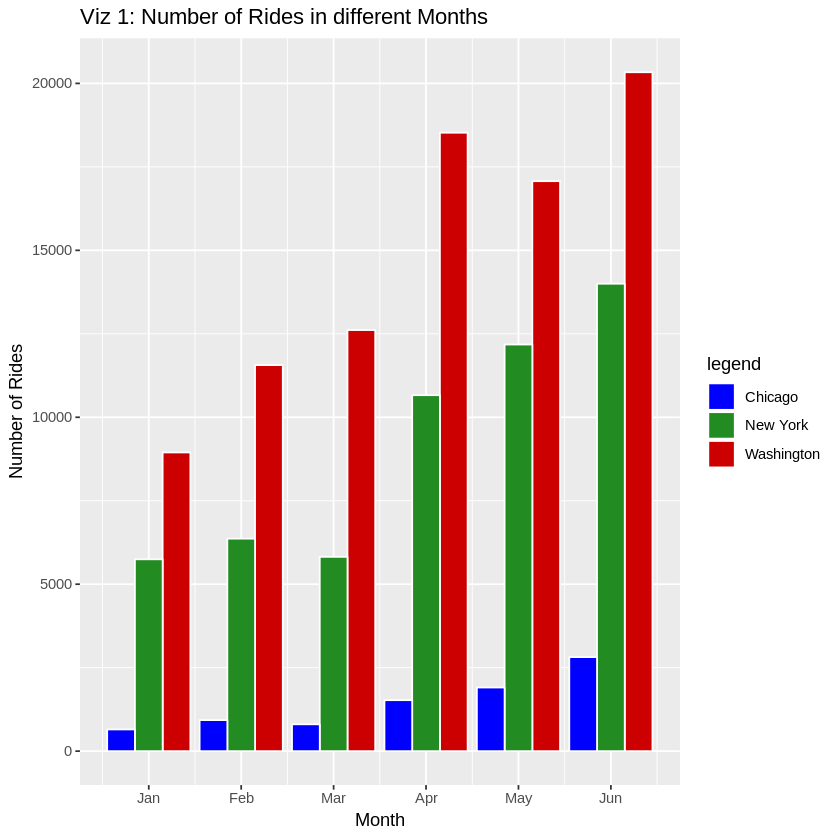

In [19]:
# Solution for --> What is the most common month?

library(ggplot2)
library(lubridate)
library(tidyverse)

# Reformatting for date coloumn

city$Start.Time <- ymd_hms(city$Start.Time)
city$End.Time <- ymd_hms(city$End.Time)
city$Month <- month(city$Start.Time)

# Printing Output

head(city)

# Visualizing data

ggplot(aes(x = Month, fill = City), data = city) +
    geom_bar(position = 'dodge', colour="white") +
    scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')) +
    ggtitle('Viz 1: Number of Rides in different Months') +
    labs(y = 'Number of Rides', x = 'Month') +
    scale_fill_manual("legend", values = c("Chicago" = "blue", "New York" = "#228B22", "Washington" = "#cc0000"))

# Comments: The below vizualization(Viz 1) represents "June" month has high number rides in all the cities (New York, Chicago & Washington) comparing all the cities "Washington" has highest

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Month,Weekday,Hours,Hours_in_class
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington,6,4,08,8
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Washington,3,7,10,10
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA,Washington,5,3,01,1
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA,Washington,4,1,07,7
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA,Washington,6,7,08,8
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA,Washington,5,1,07,7


[1] "numeric"

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

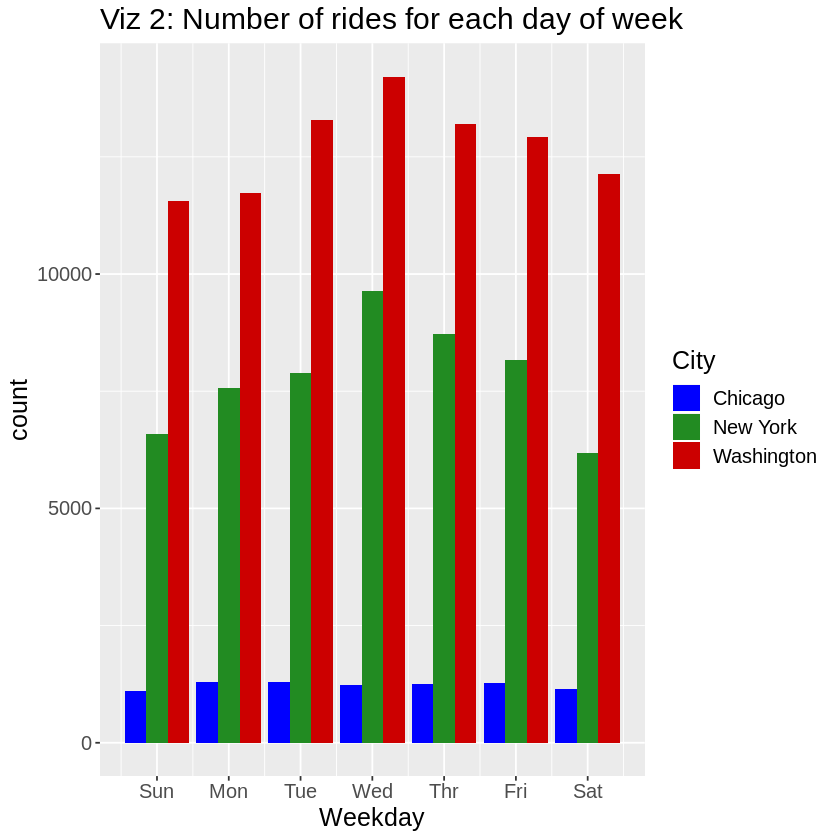

In [20]:
# Solution for --> What is the most common day of week?

# Adding the weekday for dateframe

city$Weekday <- wday(city$Start.Time)

# Printing output

head(city)
class(city$Weekday)

# Visualizing data

ggplot(aes(x=Weekday, fill=City), data=city) +
    geom_bar(position='dodge') + 
    scale_fill_manual(values = c("blue", "#228B22", "#cc0000")) +
    scale_x_continuous(breaks=c(1,2,3,4,5,6,7), labels=c("Sun","Mon", "Tue", "Wed", "Thr", "Fri", "Sat")) +
    theme(text = element_text(size = 15)) +
    ggtitle("Viz 2: Number of rides for each day of week")

# Comments: The below Vizualization(Viz 2) represent "Weednesday" has highest number rides by the user in Washington, New York & Chicago, comparing to cities "Washington" has highest

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,Month,Weekday,Hours,Hours_in_class
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington,6,4,08,8
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Washington,3,7,10,10
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA,Washington,5,3,01,1
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA,Washington,4,1,07,7
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA,Washington,6,7,08,8
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA,Washington,5,1,07,7


Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

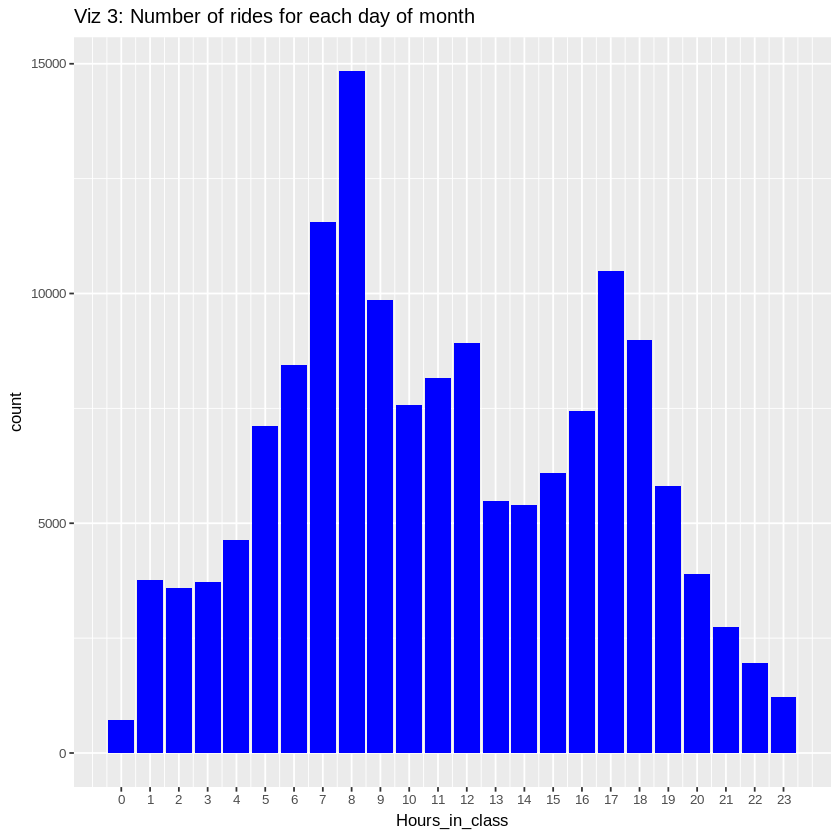

In [21]:
# What is the most common hour of day?

# Accessing library

library(lubridate)
library(dplyr)

# Adding hours coloum to date frame and converting into format

city$Hours <- format(as.POSIXct(city$Start.Time, format="%Y-%m-%d %H:%M:%S"),"%H")
city$Hours_in_class <- as.numeric(city$Hours)

# Printing Output

head(city)

# Visualizing data

ggplot(aes(x=Hours_in_class, fill=city), data=city) +
    geom_bar(position='dodge', fill="blue") + 
    scale_fill_manual(values = c("grey")) +
    scale_x_continuous(breaks=seq(0,23,1)) +
    theme(text = element_text(size = 10)) +
    ggtitle("Viz 3: Number of rides for each day of month")

# Comments: The below visualization(Viz 3) represent "08th Day of Month" is common day of ride in very cities

**Summary of your question 1 results goes here.**

### Question 2

**Your question 2 goes here.**


       Female   Male 
  7158  13882  42360 



       Female   Male 
 11.29  21.90  66.81 

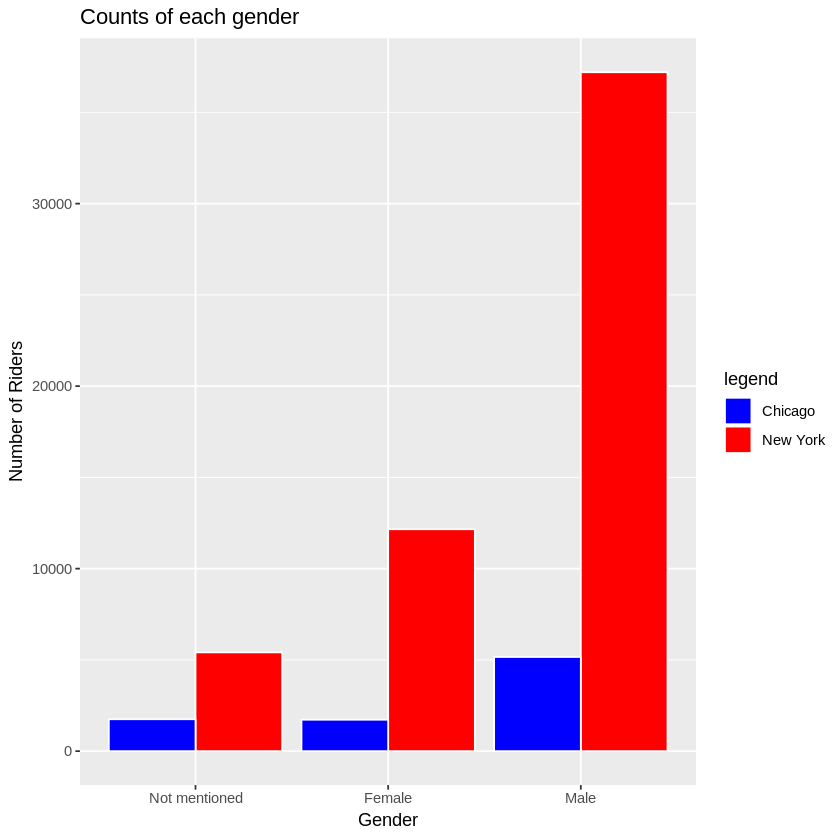

In [56]:
# Question --> What are the counts of each gender (only available for NYC and Chicago)?


# Creating new city2 by binding 'New York City' and 'Chicago' data

city2 <- concatenation(chi,ny)      #city2 <- rbind(chi, ny)

# Count of Gender (Male and Female)
total = sort(table(city2$Gender))
print(total)

# percentage of Gender (Male and Female)
round((total / length(city2$Gender) * 100), digits = 2)

# Visualizing data with ggplot
ggplot(aes(x = Gender, fill = City), data = city2) +
    geom_bar(position = 'dodge', colour="White") +
    ggtitle('Counts of each gender') +
    scale_x_discrete(labels = c('Not mentioned', 'Female', 'Male')) +
    labs(y = 'Number of Riders', x = 'Gender') +
    scale_fill_manual("legend", values = c("Chicago" = "blue", "New York" = "red"))

# Comments : 
# In Chicago and New York City, number of users:
# Male : 42360 (66.81%)
# Female : 13882 (21.90%)
# Not Mentioned: 7158 (11.29%)

**Summary of your question 2 results goes here.**

### Question 3

**Your question 3 goes here.**


   Chicago   New York Washington 
      8630      54770      89051 



   Chicago   New York Washington 
      5.66      35.93      58.41 

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

City,Average.Trip.Duration
Chicago,937.1728
New York,903.6147
Washington,1233.9533


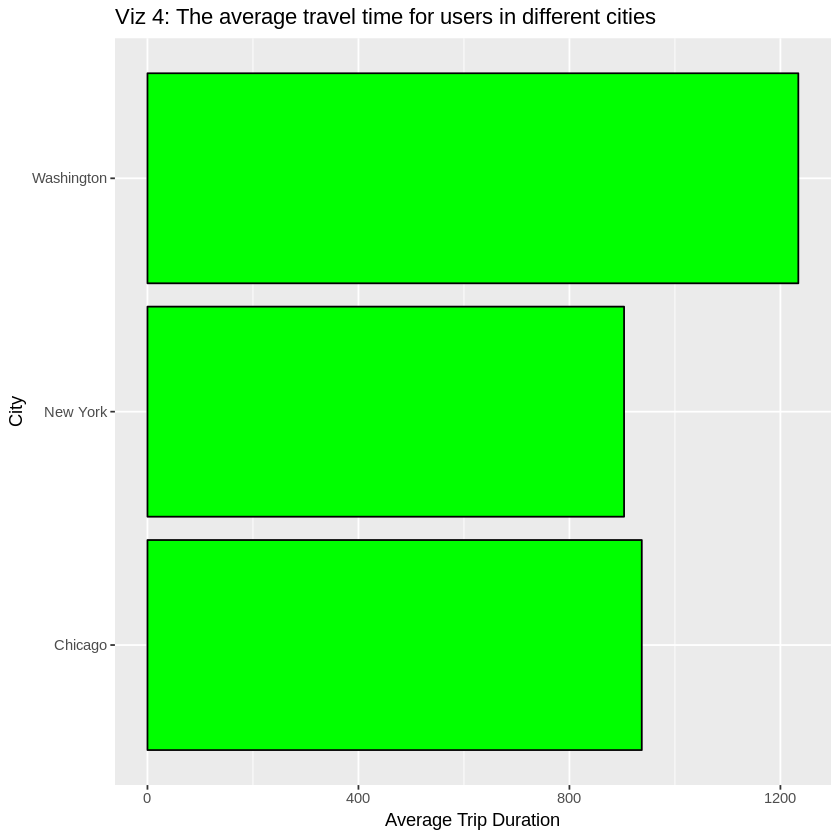

In [48]:
# Solution for --> What is the average travel time for user in different cities?

# Count of users in City

total_city = sort(table(city$City))
print(total_city)

# Percentage of users in City
round((total_city / sum(total_city) * 100), digits = 2)

# Visualizing data

ggplot(aes(x = City, y = Trip.Duration), data = city) +
    geom_bar(position = 'dodge', stat = "summary", fun.y = "mean", fill = "green", colour="black") + 
    ggtitle('Viz 4: The average travel time for users in different cities') +
    labs(y = 'Average Trip Duration', x = 'City') + coord_flip()

my.summary <- with(city, aggregate(list(Trip.Duration), by = list(City), 
                   FUN = function(x) { mon.mean = mean(x, na.rm = TRUE) } ))

colnames(my.summary) <- c('City', 'Average.Trip.Duration')
my.summary

**Summary of your question 3 results goes here.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')